In [ ]:
# pip install seaborn
%matplotlib inline

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1 load data

In [7]:
df = pd.read_csv('results.csv')
df.head()

,Category,Puzzle,Time,Backtracks,Status
0,Easy,easy_1.txt,0.0826,0,UNSAT
1,Easy,easy_10.txt,0.0842,0,UNSAT
2,Easy,easy_2.txt,0.0797,0,UNSAT
3,Easy,easy_3.txt,0.0768,0,UNSAT
4,Easy,easy_4.txt,0.0753,0,UNSAT


## 2 data preprocessing

In [9]:
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Backtracks'] = pd.to_numeric(df['Backtracks'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    40 non-null     object 
 1   Puzzle      40 non-null     object 
 2   Time        40 non-null     float64
 3   Backtracks  40 non-null     int64  
 4   Status      40 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ KB


## 3 Some stats

In [10]:
summary = df.groupby('Category').agg({
    'Time': ['mean', 'std', 'max'],
    'Backtracks': ['mean', 'max'],
    'Status': lambda x: (x == 'SAT').mean() * 100
}).round(4)

print(summary)

            Time                 Backtracks       Status
            mean     std     max       mean max <lambda>
Category                                                
Easy      0.0772  0.0055  0.0842        0.0   0      0.0
Evil      0.0855  0.0123  0.1018        0.0   0      0.0
Hard      0.0825  0.0033  0.0873        0.0   0      0.0
Medium    0.0850  0.0041  0.0928        0.0   0      0.0


## 4 VISUALAAAIIIZE

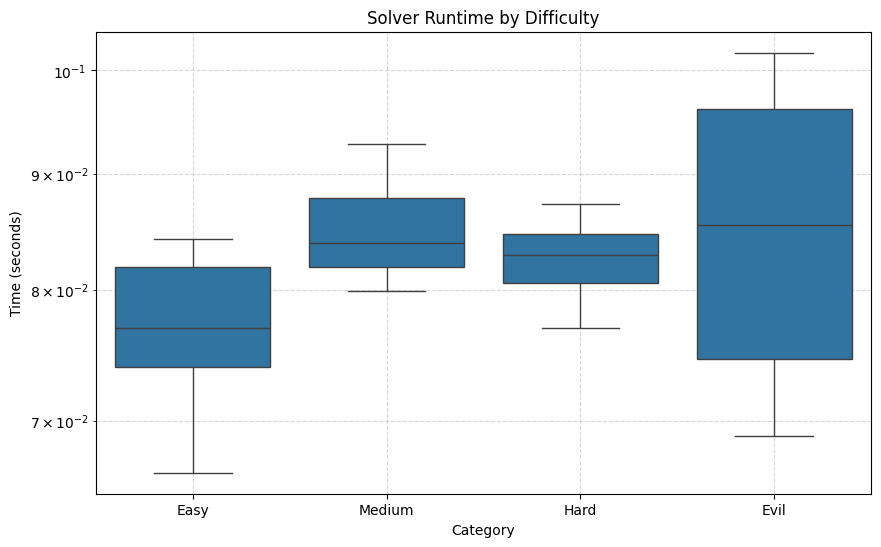

In [11]:
plt.figure(figsize=(10, 6))
order = ['Easy', 'Medium', 'Hard', 'Evil']
sns.boxplot(x='Category', y='Time', data=df, order=order)
plt.title('Solver Runtime by Difficulty')
plt.ylabel('Time (seconds)')
plt.yscale('log') # Log scale to see differences better if valid
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

C:\Users\mulderes\AppData\Local\Temp\ipykernel_38364\981107412.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


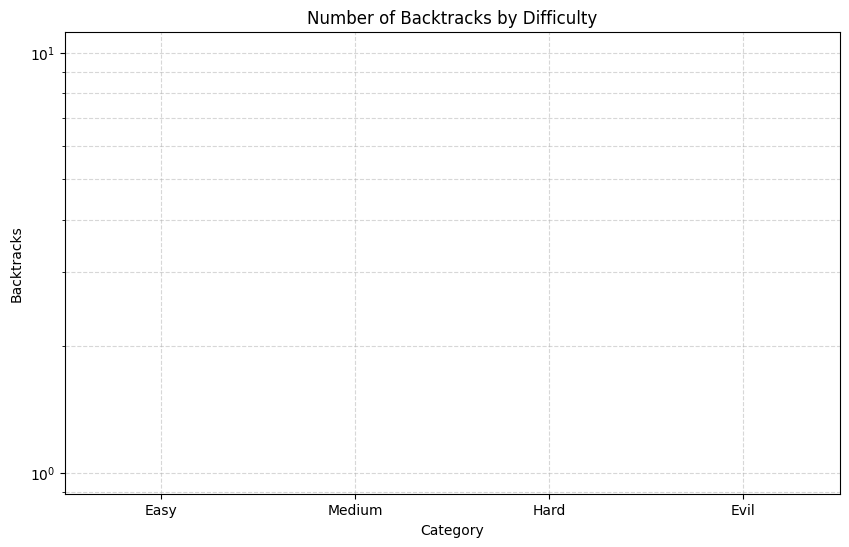

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Backtracks', data=df, order=order)
plt.title('Number of Backtracks by Difficulty')
plt.ylabel('Backtracks')
plt.yscale('log')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()